In [ ]:
!pip install mediapipe opencv-python

In [1]:
import sys
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/destinyMirror/"
sys.path.append(project_path)

from FaceAnalyzer import FaceAnalyzer
from FaceVisualizer import FaceVisualizer


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image loaded. Shape: (657, 467, 3)
3. Processing image...
--- Analysis Results ---
face_lw_ratio: 1.039
forehead_ratio: 0.339
midface_ratio: 0.362
lowerface_ratio: 0.337
eye_distance_ratio: 0.246
nose_ratio: 1.108
mouth_chin_ratio: 1.127
jaw_angle: 145.097
upper_lip_ratio: 0.11
lower_lip_ratio: 0.156
eye_aspect_ratio: 0.265
eye_curvature_ratio: 0.059
eye_symmetry: 0.959


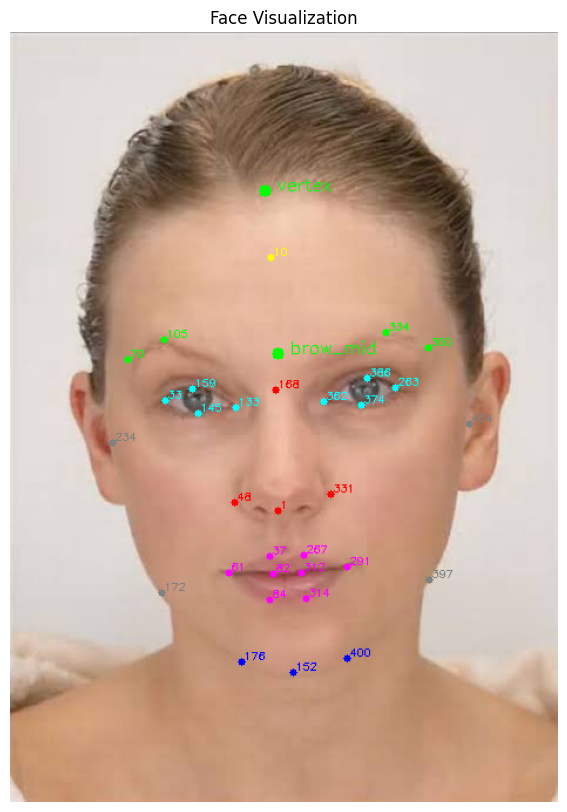

In [2]:
def main():
    analyzer = FaceAnalyzer()
    visualizer = FaceVisualizer()

    path = "/content/drive/MyDrive/destinyMirror/taylor_swift.png"
    image = cv2.imread(path)

    # CHECK 1: Did image load?
    if image is None:
        print("ERROR: Image failed to load. Check your file path!")
        return
    else:
        print(f"Image loaded. Shape: {image.shape}")

    print("3. Processing image...")


    # 1. Process (This now saves self.custom_points internally)
    stats = analyzer.process_image(image)

    if stats:
        # 2. Get Data
        landmarks = analyzer.landmarks_np
        custom_pts = analyzer.custom_points  #Grab the calculated points

        # 3. Visualize
        # A. Draw standard mesh dots
        img_dots = visualizer.draw_landmarks(image, landmarks)

        # B. Draw our new Calculated Points (Vertex & Brow Mid)
        final_img = visualizer.draw_custom_points(img_dots, custom_pts)

        # 4. Print Stats to Console
        print("--- Analysis Results ---")
        for key, value in stats.items():
          print(f"{key}: {value}")

        # 6. Show Image
        visualizer.show(final_img)

if __name__ == "__main__":
    main()